# Self Testing of Quantum systems

Lets imagine two students Alice and Bob located in different planets and some source $S$ that generates two qubits. It sends the first one to alice denoted as $|\psi\rangle_A$ and the second one to Bob $|\psi \rangle_B$. Neither Alice nor Bob know how their labs work. They each have some settings called $x$ for Alice and $y$ for Bob that can take the values $x, y = \{ 0, 1 \}$ but the dont really know how it affects to their machines. All they see after using a setting is some value $a$ for Alice and $b$ for Bob that can be $a, b = \{ +1, -1 \}$. Due to the distance, they can not comunicate each other the settings they are going to be using when reciving the qubit but they are able to share their results. So Alice and Bob choice of settings have no effect on the other but they can know the result and the setting after both of them make the experiment.

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from math import sqrt
from qiskit.quantum_info import Statevector


# Loading your IBM Q account(s)
provider = IBMQ.load_account()
simulator = Aer.get_backend('aer_simulator')
svsim = Aer.get_backend('statevector_simulator') 

COUNTS = 1000000

They are also told tha the machine generates both qubit in the state  $|\psi \rangle = \frac{1}{\sqrt{2}} (|0 \rangle_A |0\rangle_B + |1\rangle_A |1\rangle_B)$. They are very suspicious of the company that created the source so they wanted to make sure with no knowledge of the internal workings of the machine that such source is in fact generated the aboved state. In order to do that they take a set of correlations $p(ab|xy)$. Every time Alice and Bob get a result they share their result and setting with each other in order to get the full set of statistics.

In [2]:
# Source Code
def generate():
    qc = QuantumCircuit(2, name="Source")
    # Here goes the code for the generation of the state
    qc.h(0)
    qc.cx(0, 1)
    return qc

In [3]:

    
def run(m : list, x : int):
    ''' 
    @i: index of the local qubit
    @x: setting of the machine
    '''
    qc = QuantumCircuit(1, name=str(x))
    if type(m[x]) is list:
        for gate in m[x]:
            qc.append(gate, [0])
    else:
        qc.append(m[x], [0])
    return qc.to_gate()

    
    
def measure(qc):
    # Run and get counts
    result = execute(qc, simulator, shots=COUNTS, seed_simulator=5556, seed_transpiler=5556).result()
    counts = result.get_counts(qc)
    return counts

def measure_statevector(qc):
    result = execute(qc, svsim, shots=1).result()
    return Statevector(result.get_statevector())


In [4]:
def alice():
    from qiskit.circuit.library import HGate, IGate
    m = [IGate(), HGate()]
    return m

def bob():
    from  qiskit.circuit.library import RYGate, HGate, XGate, ZGate
    from math import pi
    theta = pi/4
    m = [[RYGate(theta), HGate()], [RYGate(theta)]]
    return m

al = alice()
bo = bob()

qcd = QuantumCircuit(2)
qcd.append(generate(), [0, 1])
qcd.append(al[0], [0])
qcd.append(al[1], [1])
print(qcd.draw("latex_source"))
    

% \documentclass[preview]{standalone}
% If the image is too large to fit on this documentclass use
\documentclass[draft]{beamer}
% img_width = 2, img_depth = 4
\usepackage[size=custom,height=10,width=12,scale=0.7]{beamerposter}
% instead and customize the height and width (in cm) to fit.
% Large images may run out of memory quickly.
% To fix this use the LuaLaTeX compiler, which dynamically
% allocates memory.
\usepackage[braket, qm]{qcircuit}
\usepackage{amsmath}
\pdfmapfile{+sansmathaccent.map}
% \usepackage[landscape]{geometry}
% Comment out the above line if using the beamer documentclass.
\begin{document}

\begin{equation*}
    \Qcircuit @C=1.0em @R=0.2em @!R {
	 	\lstick{ {q}_{0} :  } & \multigate{1}{\mathrm{Source}} & \gate{\mathrm{I}} & \qw & \qw\\
	 	\lstick{ {q}_{1} :  } & \ghost{\mathrm{Source}} & \gate{\mathrm{H}} & \qw & \qw\\
	 }
\end{equation*}

\end{document}


In [5]:
t = {'0' : 1, '1': -1}
correlations = {}
for x in range(2):
    for y in range(2):
        qc = generate()
        qc.append(run(al, x), [0])
        qc.append(run(bo, y), [1])
        qc.measure_all()
        counts = measure(qc)
        corr = {k : v / COUNTS for k, v in counts.items()}
        correlations['xy = ' + str(x) + str(y)] = corr
correlations



{'xy = 00': {'01': 0.07341, '11': 0.427196, '10': 0.073359, '00': 0.426035},
 'xy = 01': {'01': 0.07341, '11': 0.427196, '10': 0.073359, '00': 0.426035},
 'xy = 10': {'01': 0.07341, '11': 0.427196, '10': 0.073359, '00': 0.426035},
 'xy = 11': {'11': 0.073289, '00': 0.07313, '10': 0.427266, '01': 0.426315}}

In [6]:
def latex_correlations(correlations):
    s = ""
    for k, v in correlations.items():
        s += "\\hline \n$(" + k[5] + "," + k[6] + ")$"
        prob = [0, 0, 0, 0]
        for ki, vi in v.items():
            prob[int(ki, 2)] = vi
        for i in prob:
            s += " & $" + str(i) + "$"
        s += " \\\\ \n"
    return s
print(latex_correlations(correlations))

\hline 
$(0,0)$ & $0.426035$ & $0.07341$ & $0.073359$ & $0.427196$ \\ 
\hline 
$(0,1)$ & $0.426035$ & $0.07341$ & $0.073359$ & $0.427196$ \\ 
\hline 
$(1,0)$ & $0.426035$ & $0.07341$ & $0.073359$ & $0.427196$ \\ 
\hline 
$(1,1)$ & $0.07313$ & $0.426315$ & $0.427266$ & $0.073289$ \\ 



The above result shows the correlations found by Alice and bob for each of the settings they can mix together.

In [7]:
def avg(corr, t):
    avg = []
    for c in corr:
        avg_c = 0
        for res, counts in c.items():
            val = 1
            for eig in res:
                val *= t[eig]
            avg_c += val * counts
        avg.append(avg_c)
    return avg
            

In [8]:
avgs = avg(correlations.values(), t)
avgs

[0.706462, 0.706462, 0.706462, -0.707162]

And finding the average values found by alice and Bob we can check by means of Bell's inequalities whether the correlations found are non local.

In [9]:
def CHSH(avgs):
    return avgs[0] + avgs[1] + avgs[2] - avgs[3]
CHSH(avgs) <= 2

False

We can check that Alice and Bob's correlations violate the CHSH inequality and as such $S$ must be generating entangled qubits

In [10]:
CHSH(avgs)

2.826548

And it is also close to the maximal violation of the CHSH inequality $2\sqrt{2}$. 

In order to self test the state $|\phi \rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$ and the local measurements $M_{a|x}$ and $N_{b|x}$. We must find and isometry that takes some state $|\psi \rangle$ compatible with the correlations found into the state  $|\phi\rangle$. Such isometry can be build from the realization that if the maximal violation is found than the mesaurements must anticomute and as such we can build an isometry in the following way

In [13]:
def isometry():
    ancA = QuantumRegister(1, name="ancA")
    psi = QuantumRegister(2, name="psi")
    ancB = QuantumRegister(1, name="ancB")
    qc = QuantumCircuit(ancA, psi, ancB, name="isometry")

    from qiskit.extensions import UnitaryGate, XGate, ZGate
    A = [XGate(), ZGate()]
    matrix = 1/sqrt(2) * (A[0].to_matrix() + A[1].to_matrix())
    Za = UnitaryGate(matrix, label="Z_A").control(1)
    matrix = 1/sqrt(2) * (A[0].to_matrix() - A[1].to_matrix())
    Xa = UnitaryGate(matrix, label="X_A").control(1)

    # In this example the measurements are the same
    B = [XGate(), ZGate()]
    matrix = 1/sqrt(2) * (B[0].to_matrix() + B[1].to_matrix())
    Zb = UnitaryGate(matrix, label="Z_B").control(1)
    matrix = 1/sqrt(2) * (B[0].to_matrix() - B[1].to_matrix())
    Xb = UnitaryGate(matrix, label="X_B").control(1)

    qc.h(0)
    qc.h(3)
    qc.append(Za, [0, 1])
    qc.append(Zb, [3, 2])
    qc.h(0)
    qc.h(3)
    qc.append(Xa, [0, 1])
    qc.append(Xb, [3, 2])
    return qc



This isometry takes some state $|\psi\rangle$ embedded in $q_1$ and $q_2$ into a higher system with the ancillas qubits $q_0$ and $q_3$. $Z_A$, $Z_B$, $X_A$ and $X_B$ are built from the measurements. 

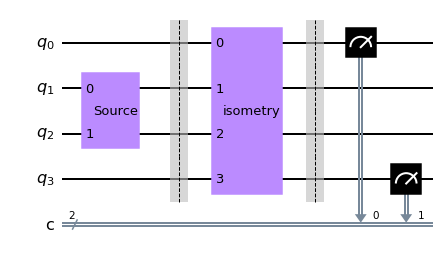

In [14]:
qc = QuantumCircuit(4,2)

qci = generate()
qc.append(qci.to_instruction(), [1,2])
qc.barrier()
qc.append(isometry(), range(4))
qc.barrier()
qc.measure(0,0)
qc.measure(3,1)
qc.draw()

In [21]:
result = measure(qc)
result = {k : v / COUNTS for k, v in result.items()}
result

{'00': 0.499445, '11': 0.500555}

As expected the isometry has extracted the state $|\phi\rangle$ into the ancilla space from the state $|\psi\rangle$
